##  Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

##  Load the Data

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## Split the Data into Train-Test

In [7]:
y = df['sentiment']
X = df[['review']]

In [8]:
X.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [9]:
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [10]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.head()

,review
39087,That's what I kept asking myself during the ma...
30893,I did not watch the entire movie. I could not ...
45278,A touching love story reminiscent of In the M...
16398,This latter-day Fulci schlocker is a totally a...
13653,"First of all, I firmly believe that Norwegian ..."


In [12]:
X_train.shape

(40000, 1)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 1) (40000,)
(10000, 1) (10000,)


## Data Preprocessing

In [14]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [15]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [16]:
# tqdm is a package that create progress bars and estimate TTC (Time To Completion) for the functions 

from tqdm import tqdm, tqdm_notebook

In [17]:
tqdm.pandas()

In [19]:
# Now we can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['review'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|████████████████████████████████████████████████████████████████████████████| 40000/40000 [36:22<00:00, 18.33it/s]


,0,1
39087,kept ask mani fight scream match swear gener m...,209
30893,watch entir movi could watch entir movi stop d...,146
45278,touch love stori reminisc mood love draw heavi...,43
16398,latter day fulci schlocker total abysm concoct...,98
13653,first firmli believ norwegian movi continu get...,157


In [20]:
temp_df.columns = ['clean_review_stem', 'review_length_stem']

temp_df.head()

,clean_review_stem,review_length_stem
39087,kept ask mani fight scream match swear gener m...,209
30893,watch entir movi could watch entir movi stop d...,146
45278,touch love stori reminisc mood love draw heavi...,43
16398,latter day fulci schlocker total abysm concoct...,98
13653,first firmli believ norwegian movi continu get...,157


In [21]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,review,clean_review_stem,review_length_stem
39087,That's what I kept asking myself during the ma...,kept ask mani fight scream match swear gener m...,209
30893,I did not watch the entire movie. I could not ...,watch entir movi could watch entir movi stop d...,146
45278,A touching love story reminiscent of In the M...,touch love stori reminisc mood love draw heavi...,43
16398,This latter-day Fulci schlocker is a totally a...,latter day fulci schlocker total abysm concoct...,98
13653,"First of all, I firmly believe that Norwegian ...",first firmli believ norwegian movi continu get...,157


In [22]:
temp_df = X_train['review'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|████████████████████████████████████████████████████████████████████████████| 40000/40000 [55:59<00:00, 11.91it/s]


,0,1
39087,kept asking many fight screaming match swearin...,209
30893,watch entire movie could watch entire movie st...,146
45278,touching love story reminiscent mood love draw...,43
16398,latter day fulci schlocker totally abysmal con...,98
13653,first firmly believe norwegian movie continual...,157


In [23]:
temp_df.columns = ['clean_review_lemma', 'review_length_lemma']

temp_df.head()

,clean_review_lemma,review_length_lemma
39087,kept asking many fight screaming match swearin...,209
30893,watch entire movie could watch entire movie st...,146
45278,touching love story reminiscent mood love draw...,43
16398,latter day fulci schlocker totally abysmal con...,98
13653,first firmly believe norwegian movie continual...,157


In [24]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,review,clean_review_stem,review_length_stem,clean_review_lemma,review_length_lemma
39087,That's what I kept asking myself during the ma...,kept ask mani fight scream match swear gener m...,209,kept asking many fight screaming match swearin...,209
30893,I did not watch the entire movie. I could not ...,watch entir movi could watch entir movi stop d...,146,watch entire movie could watch entire movie st...,146
45278,A touching love story reminiscent of In the M...,touch love stori reminisc mood love draw heavi...,43,touching love story reminiscent mood love draw...,43
16398,This latter-day Fulci schlocker is a totally a...,latter day fulci schlocker total abysm concoct...,98,latter day fulci schlocker totally abysmal con...,98
13653,"First of all, I firmly believe that Norwegian ...",first firmli believ norwegian movi continu get...,157,first firmly believe norwegian movie continual...,157


In [25]:
X_train.head()

,review,clean_review_stem,review_length_stem,clean_review_lemma,review_length_lemma
39087,That's what I kept asking myself during the ma...,kept ask mani fight scream match swear gener m...,209,kept asking many fight screaming match swearin...,209
30893,I did not watch the entire movie. I could not ...,watch entir movi could watch entir movi stop d...,146,watch entire movie could watch entire movie st...,146
45278,A touching love story reminiscent of In the M...,touch love stori reminisc mood love draw heavi...,43,touching love story reminiscent mood love draw...,43
16398,This latter-day Fulci schlocker is a totally a...,latter day fulci schlocker total abysm concoct...,98,latter day fulci schlocker totally abysmal con...,98
13653,"First of all, I firmly believe that Norwegian ...",first firmli believ norwegian movi continu get...,157,first firmly believe norwegian movie continual...,157


## Creating the WordCloud

In [26]:
y_train

39087    negative
30893    negative
45278    positive
16398    negative
13653    negative
           ...   
11284    positive
44732    positive
38158    negative
860      positive
15795    positive
Name: sentiment, Length: 40000, dtype: object

In [27]:
pos_df = X_train.loc[y_train=='positive', :]

pos_df.head()

,review,clean_review_stem,review_length_stem,clean_review_lemma,review_length_lemma
45278,A touching love story reminiscent of In the M...,touch love stori reminisc mood love draw heavi...,43,touching love story reminiscent mood love draw...,43
30219,The people who are bad-mouthing this film are ...,peopl bad mouth film understand film begin peo...,111,people bad mouthing film understand film begin...,111
14290,I own the miniseries on DVD because I love thi...,miniseri dvd love stori much one best period p...,87,miniseries dvd love story much one best period...,87
24755,"ELVIRA, MISTRESS OF THE DARK (1988)<br /><br /...",elvira mistress dark br br direct jame signore...,211,elvira mistress dark br br directed james sign...,211
48038,"Considering all the teen films like ""the Break...",consid teen film like breakfast club pretti pi...,76,considering teen film like breakfast club pret...,76


In [29]:
words = ' '.join(pos_df['clean_review_lemma'])

print(words[:100])

touching love story reminiscent mood love drawing heavily chinese poetry used eastern people communi


### Word Cloud for Positive sentiments

In [30]:
pos_df = X_train.loc[y_train=='positive', :]

words = ' '.join(pos_df['clean_review_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [31]:
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

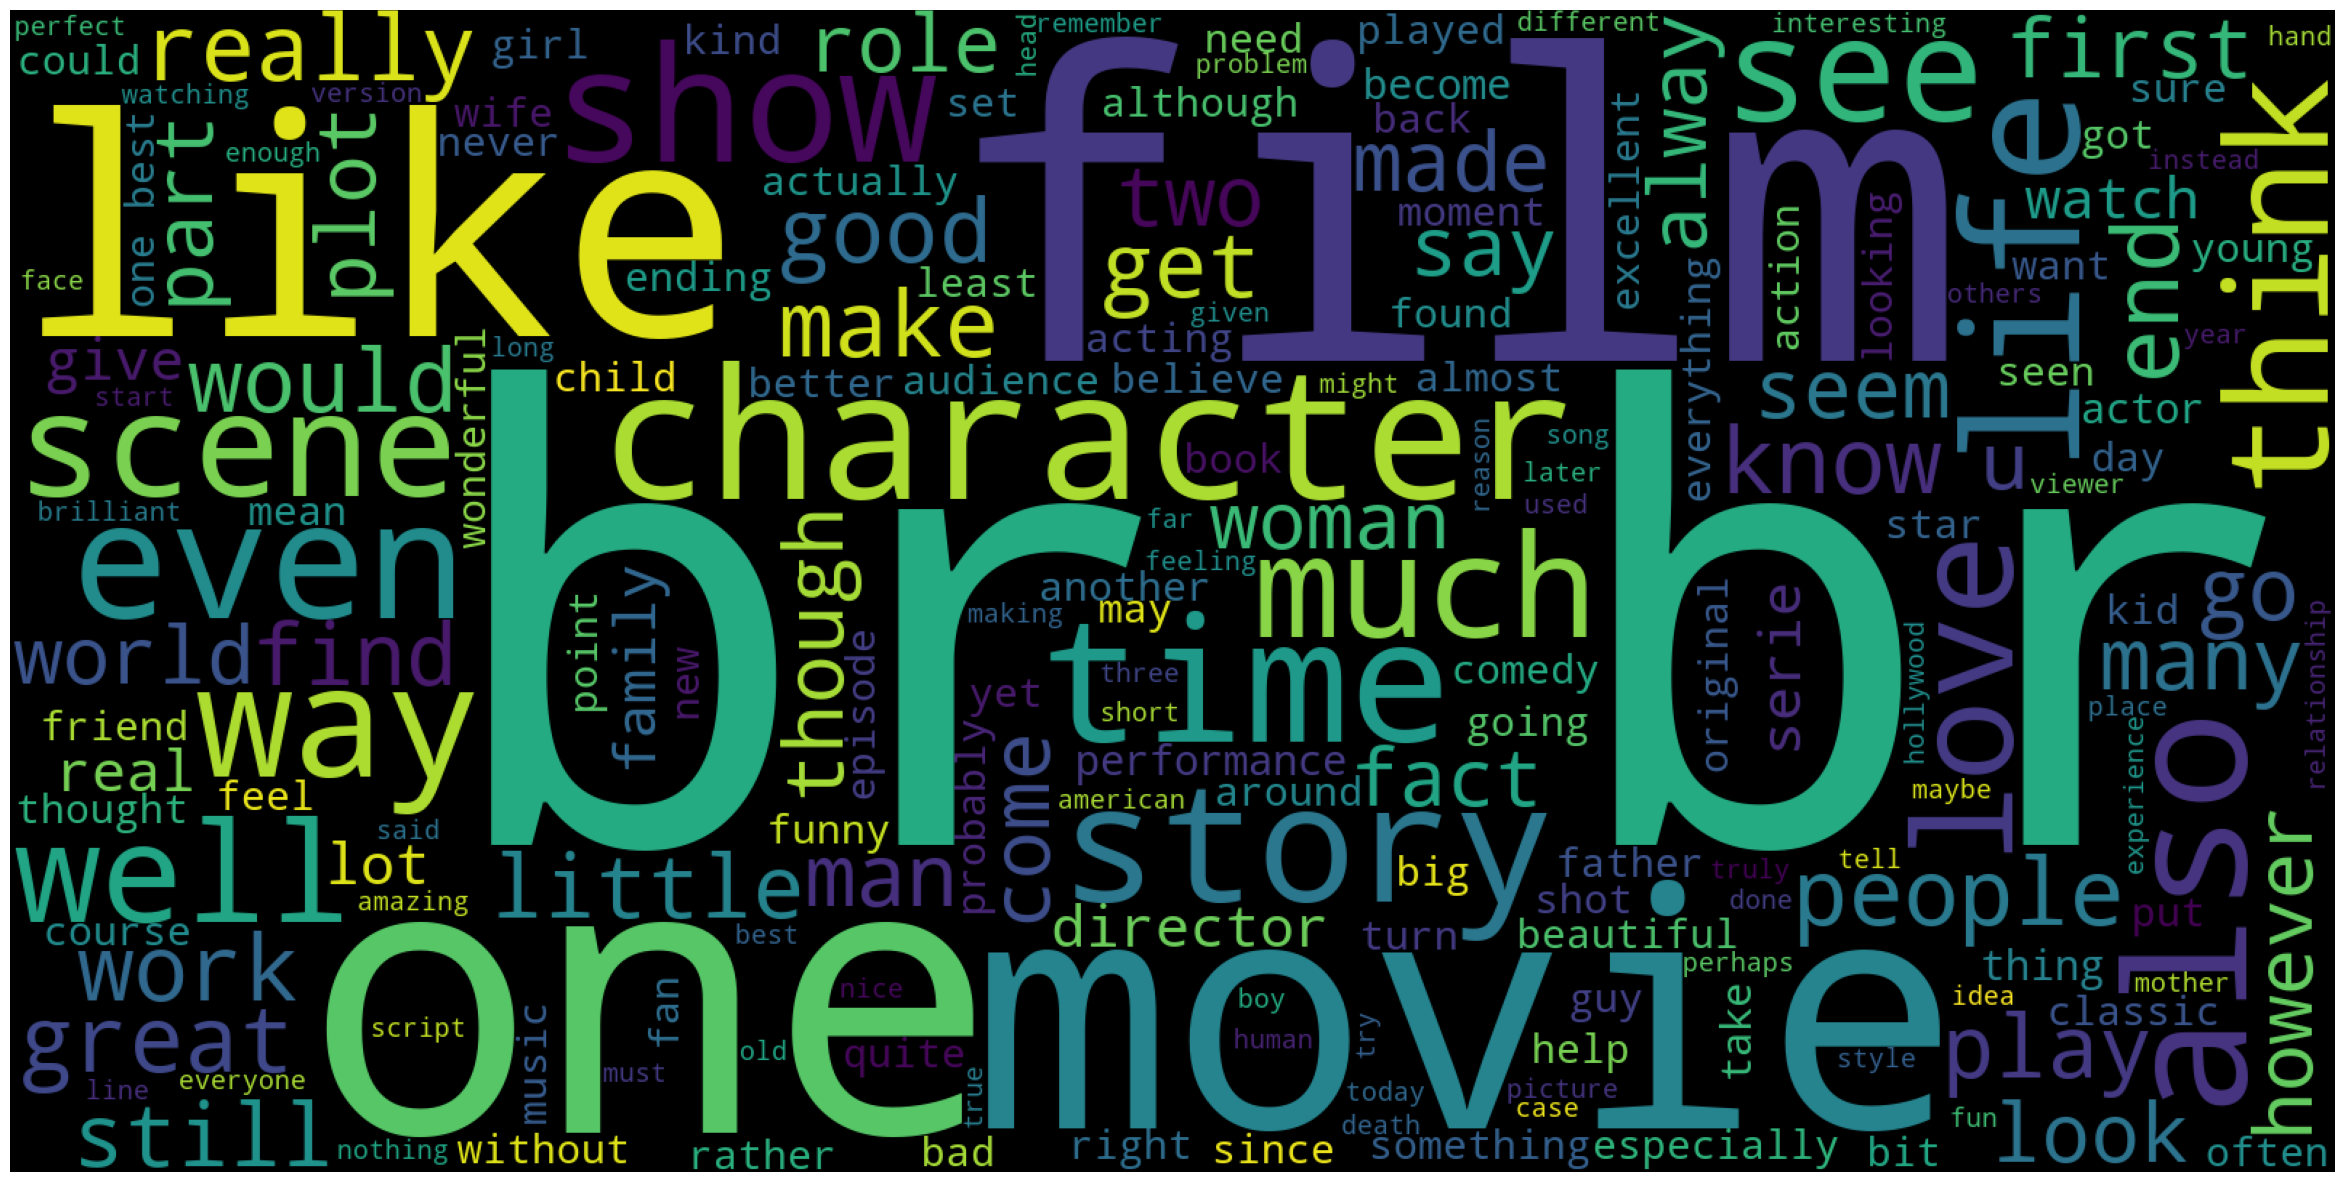

In [32]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

### Word Cloud for Negative Sentiments

In [33]:
neg_df = X_train.loc[y_train=='negative', :]

words = ' '.join(neg_df['clean_review_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [34]:
neg_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

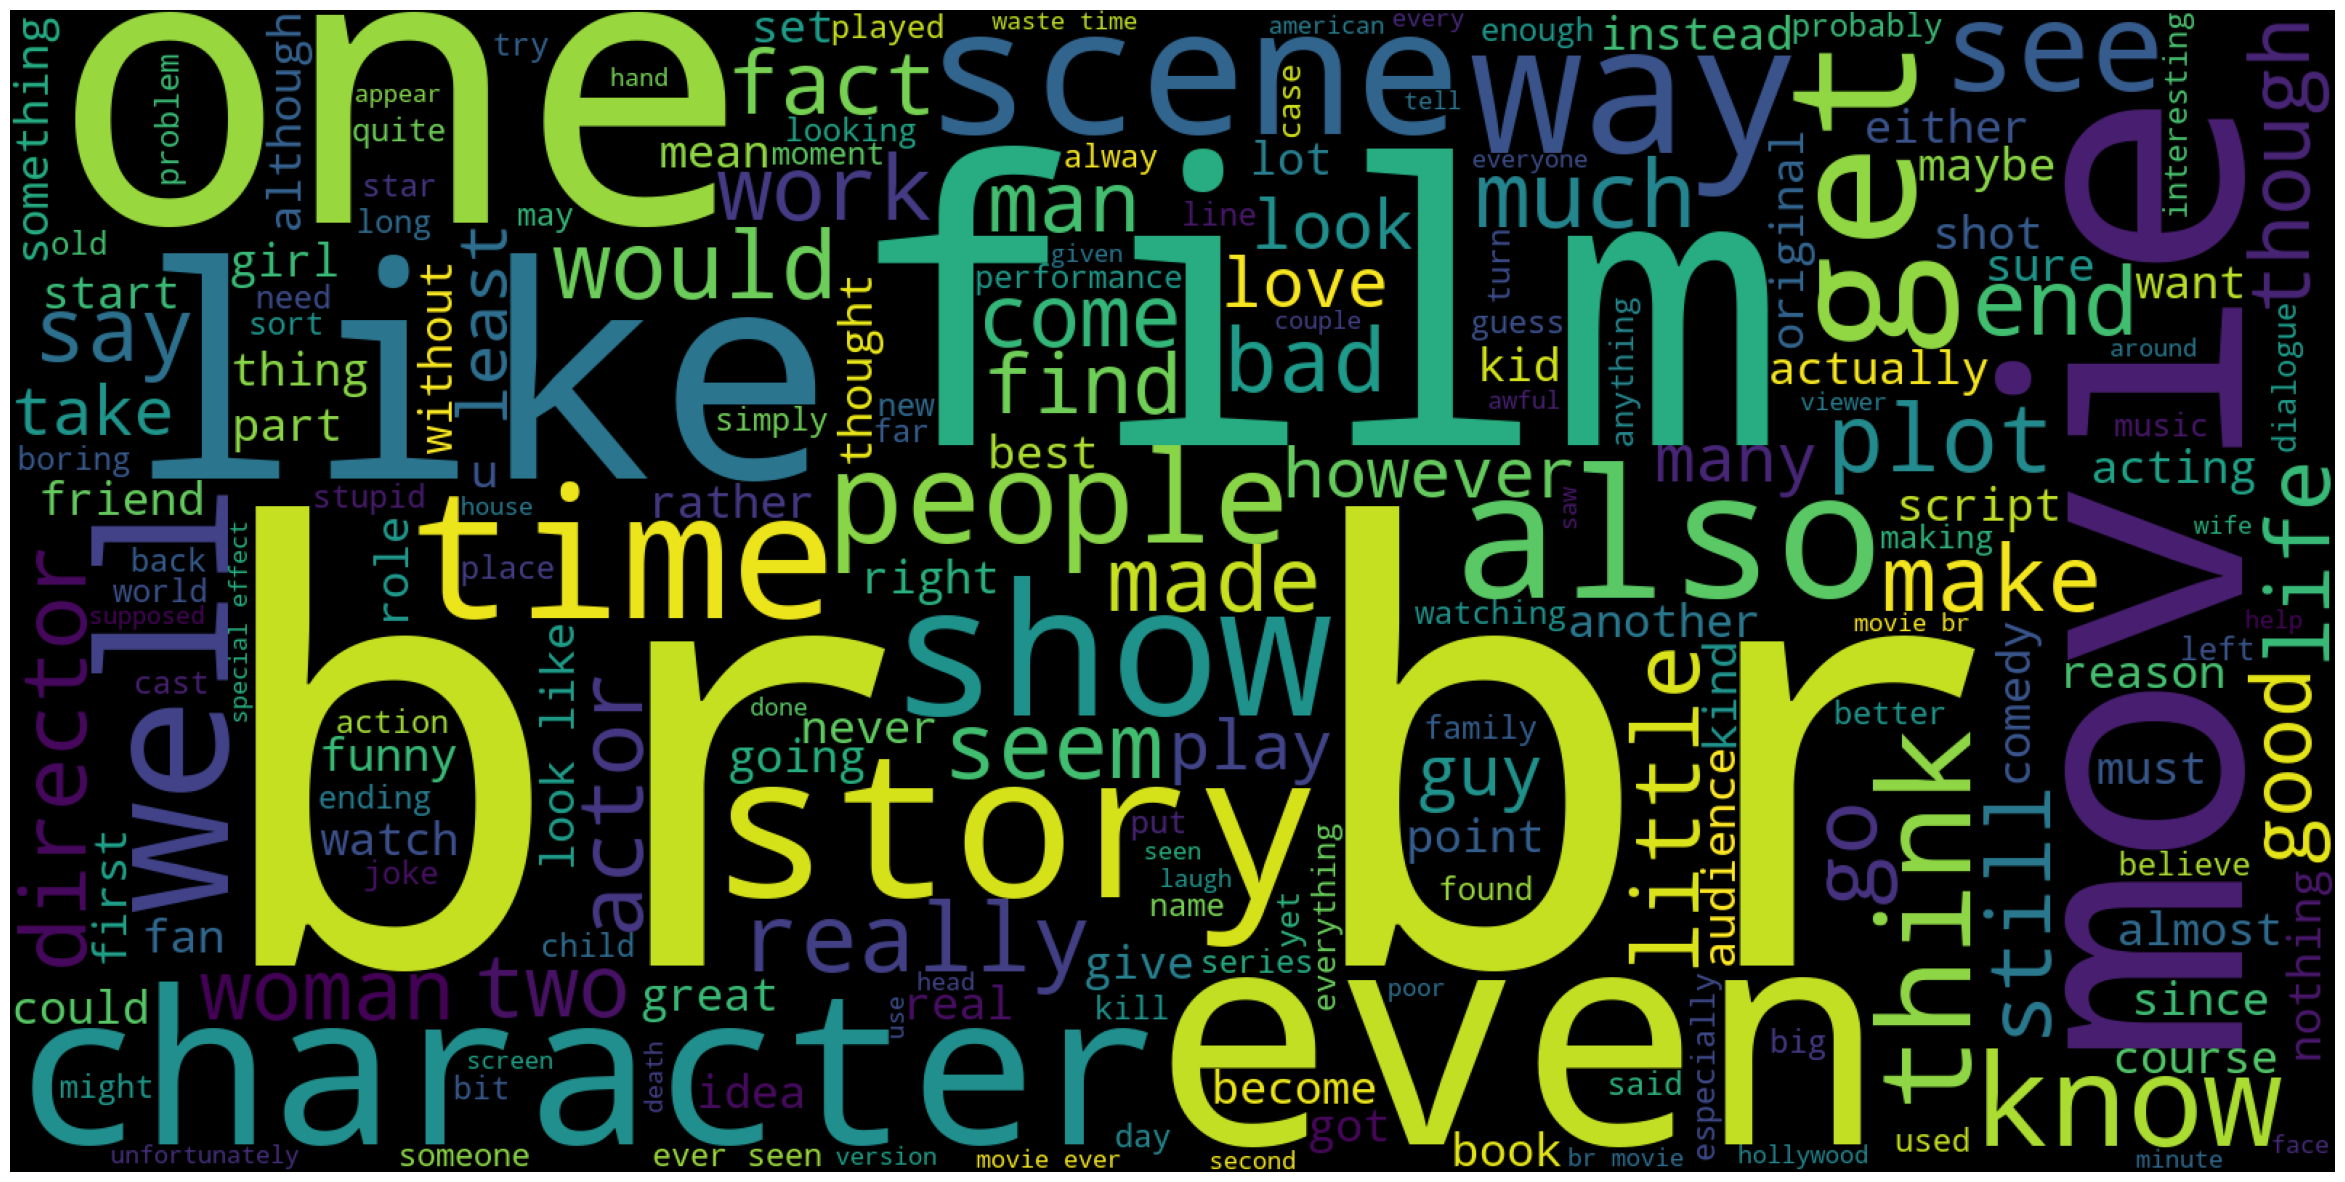

In [36]:
plt.figure(1,figsize=(30,20))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show()

## Converting Text to Numerical Vectors - BOW Representation

**Step 1** - Learn the vocabulary from the train data  
**Step 2** - Transform the `train['reviews']` to `X_train` (i.e. DTM)  
**Step 3** - Transform the `test['reviews']` to `X_test` (i.e. DTM)

In [37]:
X_train.head()

,review,clean_review_stem,review_length_stem,clean_review_lemma,review_length_lemma
39087,That's what I kept asking myself during the ma...,kept ask mani fight scream match swear gener m...,209,kept asking many fight screaming match swearin...,209
30893,I did not watch the entire movie. I could not ...,watch entir movi could watch entir movi stop d...,146,watch entire movie could watch entire movie st...,146
45278,A touching love story reminiscent of In the M...,touch love stori reminisc mood love draw heavi...,43,touching love story reminiscent mood love draw...,43
16398,This latter-day Fulci schlocker is a totally a...,latter day fulci schlocker total abysm concoct...,98,latter day fulci schlocker totally abysmal con...,98
13653,"First of all, I firmly believe that Norwegian ...",first firmli believ norwegian movi continu get...,157,first firmly believe norwegian movie continual...,157


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_review_lemma'])

In [39]:
X_train_bow

<40000x81774 sparse matrix of type '<class 'numpy.int64'>'
	with 3805625 stored elements in Compressed Sparse Row format>

In [40]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 81774
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (40000, 81774)


## Preprocessing the Test Data

In [41]:
X_test.head()

,review
33553,I really liked this Summerslam due to the look...
9427,Not many television shows appeal to quite as m...
199,The film quickly gets to a major chase scene w...
12447,Jane Austen would definitely approve of this o...
39489,Expectations were somewhat high for me when I ...


In [42]:
temp_df = X_test['review'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:48<00:00, 16.99it/s]


,0,1
33553,really liked summerslam due look arena curtain...,115
9427,many television show appeal quite many differe...,193
199,film quickly get major chase scene ever increa...,67
12447,jane austen would definitely approve one br br...,64
39489,expectation somewhat high went see movie thoug...,172


In [43]:
temp_df.columns = ['clean_review_lemma', 'review_length_lemma']

temp_df.head()

,clean_review_lemma,review_length_lemma
33553,really liked summerslam due look arena curtain...,115
9427,many television show appeal quite many differe...,193
199,film quickly get major chase scene ever increa...,67
12447,jane austen would definitely approve one br br...,64
39489,expectation somewhat high went see movie thoug...,172


In [44]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,review,clean_review_lemma,review_length_lemma
33553,I really liked this Summerslam due to the look...,really liked summerslam due look arena curtain...,115
9427,Not many television shows appeal to quite as m...,many television show appeal quite many differe...,193
199,The film quickly gets to a major chase scene w...,film quickly get major chase scene ever increa...,67
12447,Jane Austen would definitely approve of this o...,jane austen would definitely approve one br br...,64
39489,Expectations were somewhat high for me when I ...,expectation somewhat high went see movie thoug...,172


In [45]:
X_test_bow = vocab.transform(X_test['clean_review_lemma'])

# Model Building

## 1. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

C:\Users\MOHAMMED AFSHAAN\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_test_pred = classifier.predict(X_test_bow)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8847
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4961
    positive       0.88      0.89      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## 2. Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [50]:
y_test_pred = dt.predict(X_test_bow)

In [51]:
print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.7262
              precision    recall  f1-score   support

    negative       0.72      0.73      0.73      4961
    positive       0.73      0.72      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



## 3. Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)

RandomForestClassifier()

In [53]:
y_test_pred = rf.predict(X_test_bow)

In [54]:
print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8623
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4961
    positive       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Conclusion
- We can observe that both logistic regression and Ensemble Algorithm(Random Forest Classifier) performed well.
- Still we can improve the accuracy of the other models by preprocessing data.